In [1]:
import os.path
import matplotlib.pyplot as plt
from tensorflow.python import pywrap_tensorflow
import numpy as np
%matplotlib inline

In [3]:
path = '../acts'
num_files = len([f for f in os.listdir(path)
                if os.path.isfile(os.path.join(path, f))])
CLASSES = ('__background__',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat', 'chair',
           'cow', 'diningtable', 'dog', 'horse',
           'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor')
class_to_ind = dict(list(zip(CLASSES[1:], list(range(len(CLASSES[1:]))))))
arr_hm = [np.empty([num_files,21,64], dtype=float),
            np.empty([num_files,21,64], dtype=float),
            np.empty([num_files,21,128], dtype=float),
            np.empty([num_files,21,128], dtype=float),
            np.empty([num_files,21,256], dtype=float),
            np.empty([num_files,21,256], dtype=float),
            np.empty([num_files,21,256], dtype=float),
            np.empty([num_files,21,512], dtype=float),
            np.empty([num_files,21,512], dtype=float),
            np.empty([num_files,21,512], dtype=float),
            np.empty([num_files,21,512], dtype=float),
            np.empty([num_files,21,512], dtype=float),
            np.empty([num_files,21,512], dtype=float)]
num_clas = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [31]:
# calculate the activation versus classes matrix
print 'loading data from text files'
predictions = np.zeros([len(os.listdir(path)),21])
for file_ind,filename in enumerate(os.listdir(path)):
#     print 'processing file {}'.format(filename)
    clas = []
    acts = []
    f = open('/'.join([path,filename]),'r')
    act_ind = 0
    for line in f.readlines():
        if line and line[0].isdigit():
            clas.append(line[:-1])
        if line.startswith('['):
            if not line.endswith(']/n'):
                acts.append([])
                acts_this_line = line[2:-1].split(' ')
                for i in acts_this_line:
                    if i is not '':
                        acts[act_ind].append(float(i))
            else:
                raise IOError('Error line with fewer numbers than expected.')
        if line.startswith(' '):
            # print 'starts with nothing'
            if line.endswith(']\n'):
                acts_this_line = line[:-2].split(' ')
                for i in acts_this_line:
                    if i is not '':
                        acts[act_ind].append(float(i))
                act_ind += 1
            else:
                acts_this_line = line.split(' ')
                for i in acts_this_line:
                    if i is not '':
                        acts[act_ind].append(float(i))

    num_clas[int(clas[0])] += 1
    for j in range(13):
        arr_hm[j][file_ind][int(clas[0])] += acts[j]
#     for ind,item in enumerate(CLASSES[1:]):
#         if item in clas:
#             file_ind = int(filename[:-4])
#             for j in range(13):
#                 arr_hm[j][file_ind][ind] += acts[j]
#             num_clas[ind+1] = num_clas[ind+1] + 1
#             ind_for_item = class_to_ind[item]
print 'loaded'

loading data from text files
loaded


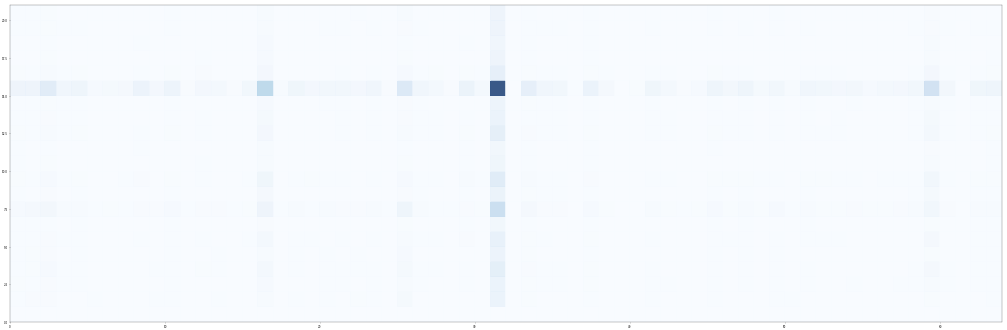

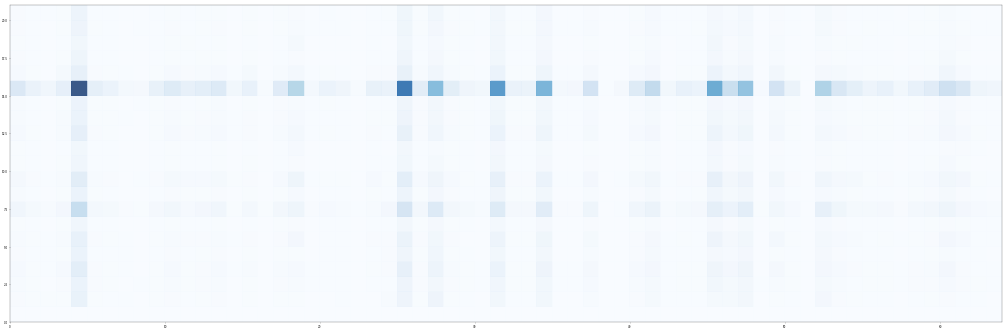

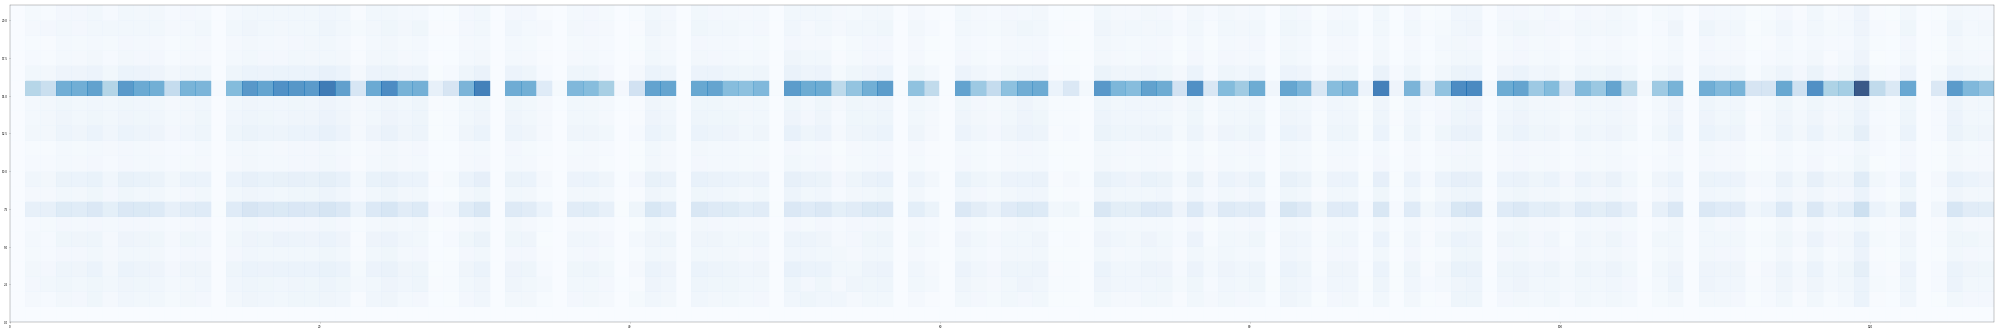

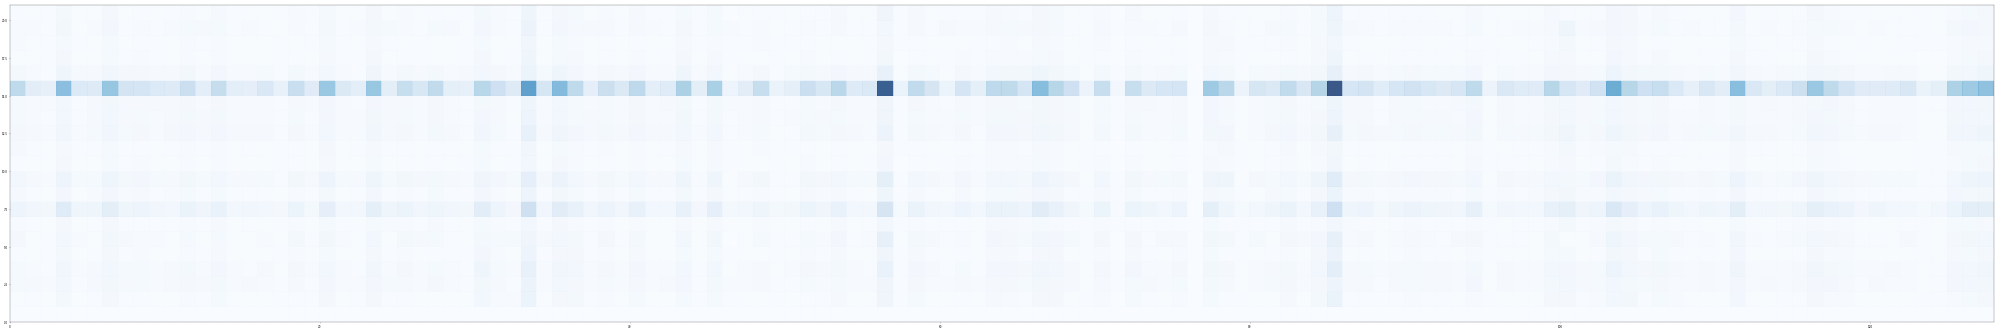

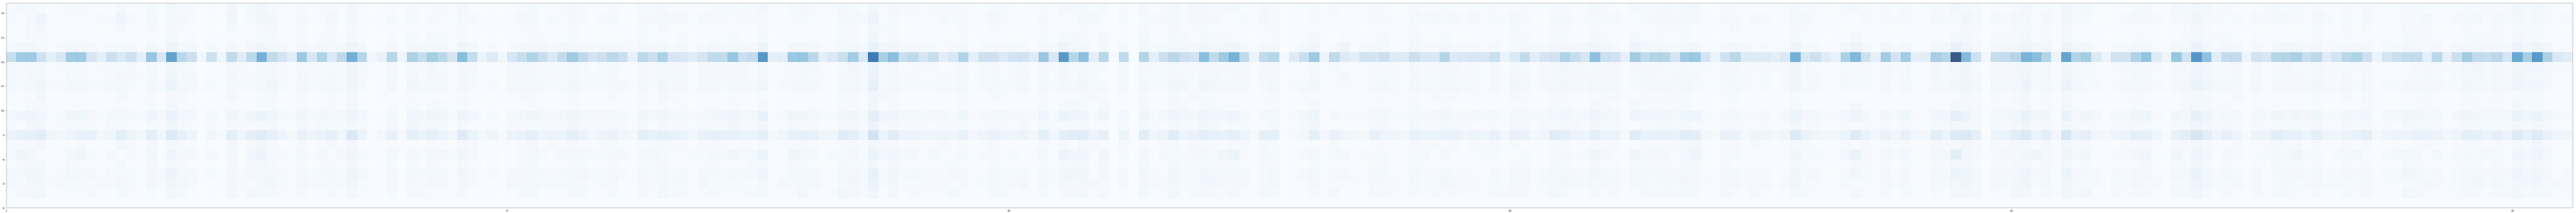

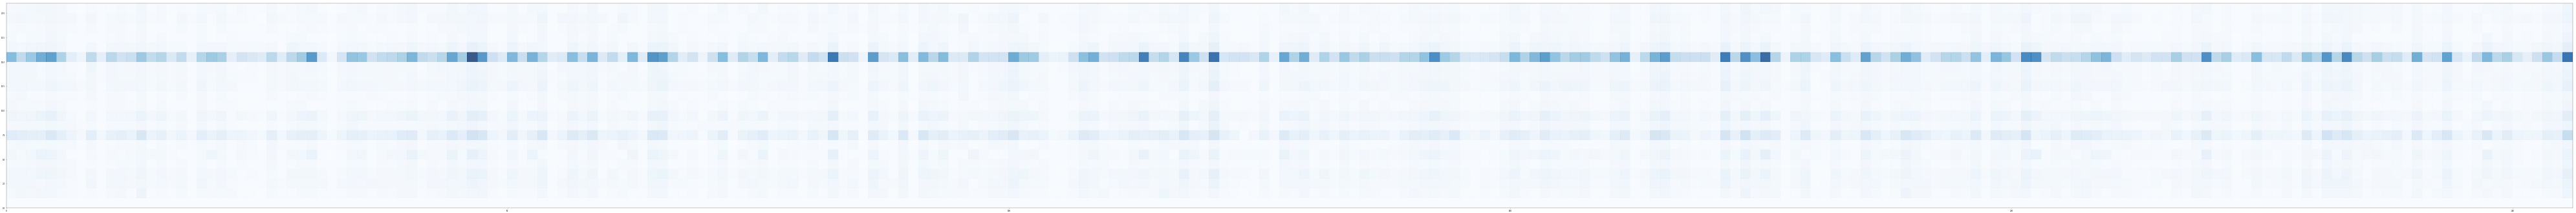

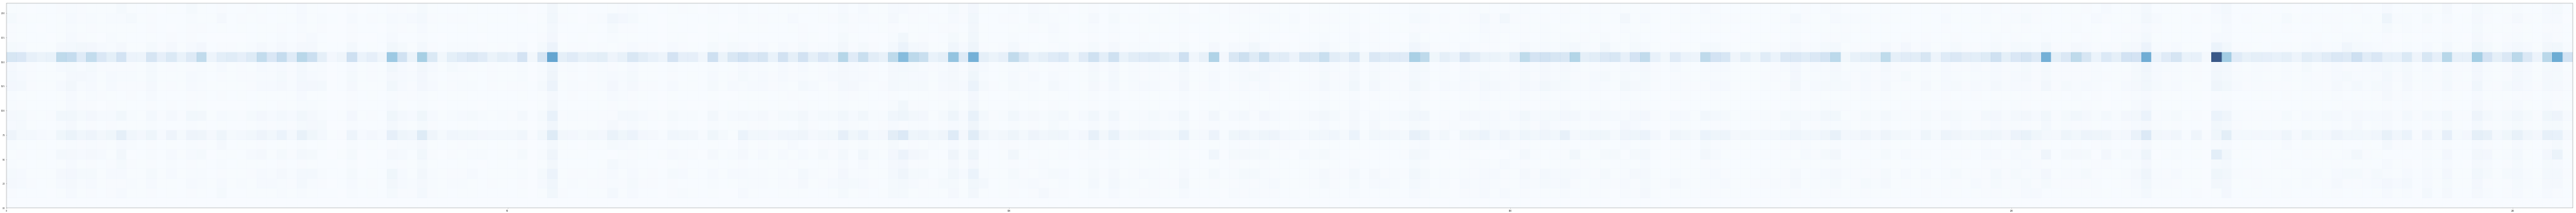

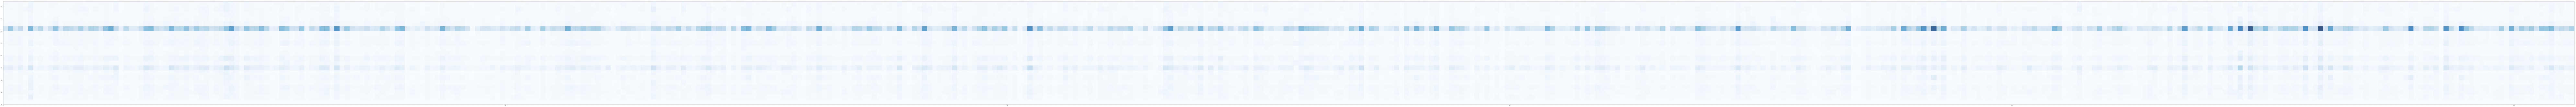

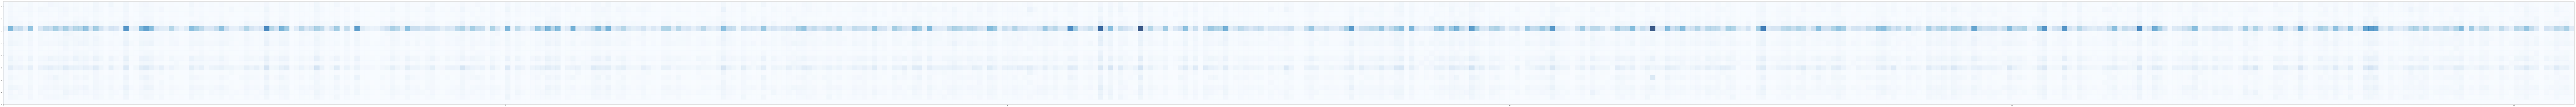

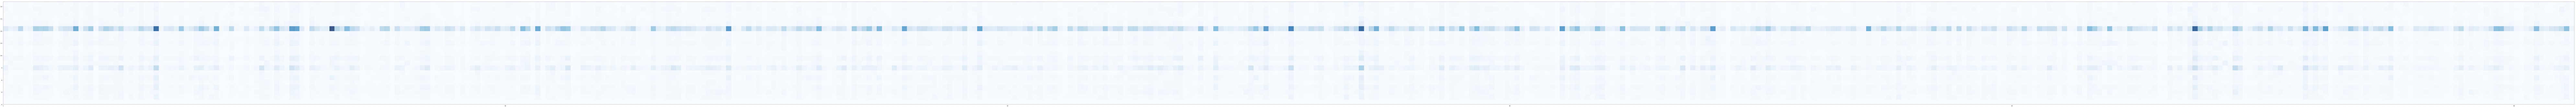

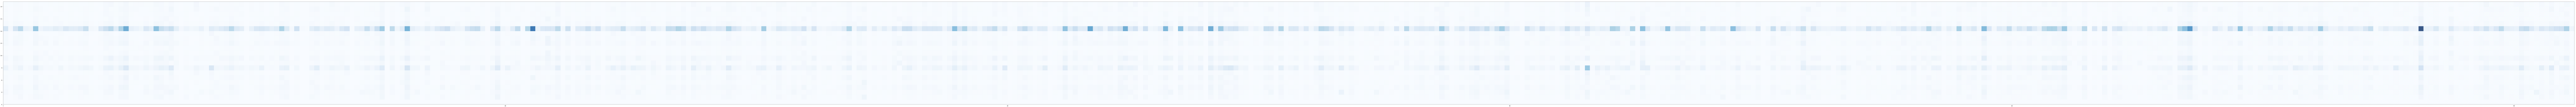

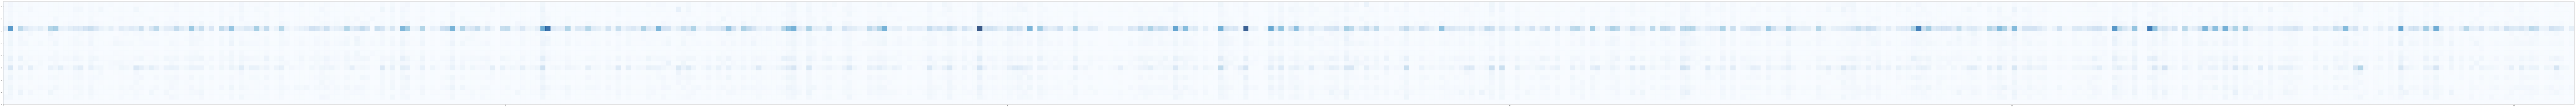

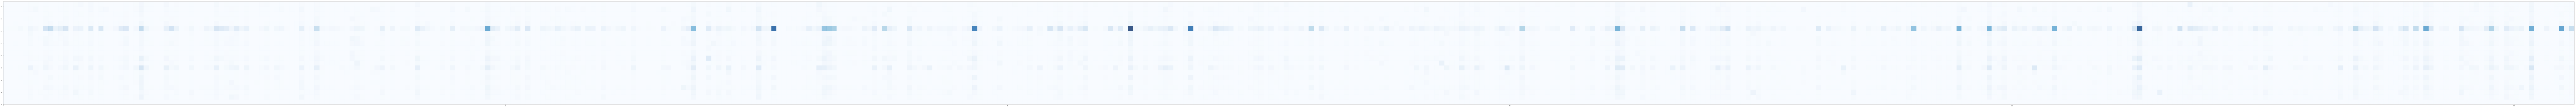

In [32]:
for i in range(13):
#     arr_hm_average = np.average(arr_hm[i],axis=0)
#     print arr_hm_average
    arr_hm_new = np.sum(arr_hm[i], axis=0)/num_clas[i]
#     print arr_hm_new.shape

    fig= plt.figure(figsize=(arr_hm_new.shape[1], 21), dpi= 20, facecolor='w', edgecolor='k')
    ax = plt.axes()
    plt.subplot()
    heatmap = ax.pcolormesh(arr_hm_new,cmap=plt.cm.Blues,alpha=0.8)
    plt.savefig('{}.png'.format(i))

In [33]:
print num_clas

[1, 285, 337, 459, 263, 469, 213, 1201, 358, 756, 244, 206, 489, 348, 325, 4528, 480, 242, 239, 282, 308]
